<a href="https://colab.research.google.com/github/sharonma1218/stats306/blob/main/lectures/lecture19_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
install.packages("modelr")
library(modelr)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("lubridate")
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("gapminder")
library(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
theme_set(theme_classic())
options(repr.plot.width=8, repr.plot.height=5)
load(url('https://datasets.stats306.org/cpus.RData'))

# Lecture 19: Simple and multiple regression

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will understand:**
* The role of categorical predictors in regression.
* How to fit multiple linear regressions using `lm()`
* How to interpret the multilinear model and `summary.lm()`
* Examples of using multiple regression on real data.
</div>

These notes follow Chapters 1, 3 and 4 of [Linear Regression Using R](https://conservancy.umn.edu/bitstream/handle/11299/189222/LinearRegressionUsingR2ed_fulltext.pdf?sequence=12&isAllowed=y).

### Categorical predictors

Last lecture we look at a simple synthetic dataset called `sim1`. It had one continuous predictor `x` and a continuous outcome `y`.

Today we'll start with `sim2`, which is similar, except that `x` is now a categorical variable:

In [6]:
sim2 %>% print

# A tibble: 40 × 2
   x          y
   <chr>  <dbl>
 1 a      1.94 
 2 a      1.18 
 3 a      1.24 
 4 a      2.62 
 5 a      1.11 
 6 a      0.866
 7 a     -0.910
 8 a      0.721
 9 a      0.687
10 a      2.07 
# ℹ 30 more rows


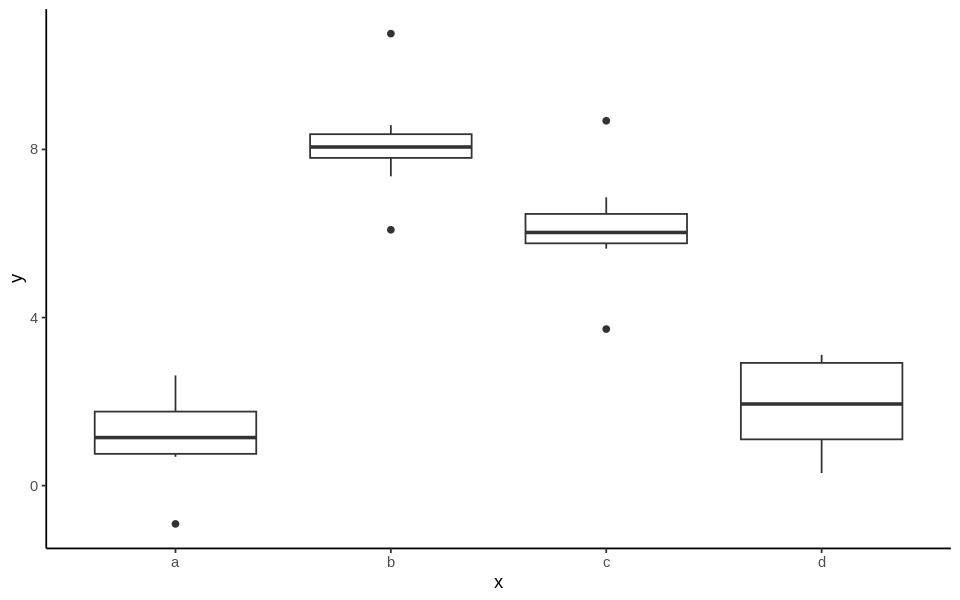

In [15]:
ggplot(sim2) + 
  geom_boxplot(aes(x=x, y=y))

What happens if we regress `y` on `x`?

In [8]:
mdl <- lm(y ~ x, sim2) 
summary(mdl)


Call:
lm(formula = y ~ x, data = sim2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40131 -0.43996 -0.05776  0.49066  2.63938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1522     0.3475   3.316  0.00209 ** 
xb            6.9639     0.4914  14.171 2.68e-16 ***
xc            4.9750     0.4914  10.124 4.47e-12 ***
xd            0.7588     0.4914   1.544  0.13131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.099 on 36 degrees of freedom
Multiple R-squared:  0.8852,	Adjusted R-squared:  0.8756 
F-statistic: 92.52 on 3 and 36 DF,  p-value: < 2.2e-16


Note: 

We found some connection b/w above and below.

If we add the coeffs of intercept and xb, we get the mean y value for b.

If we add the coeffs of intercept and xc, we get the mean y value for c. 

In [11]:
sim2%>%
  group_by(x)%>%
  summarize(mean=mean(y))%>%
  print

# A tibble: 4 × 2
  x      mean
  <chr> <dbl>
1 a      1.15
2 b      8.12
3 c      6.13
4 d      1.91


Regressing `y` on `x` has led R to create three new predictors. In fact, it has estimated the model

$$y = a_0 + a_1\{x=b\} + a_2\{x=c\} + a_3\{x=d\}.$$

Each of the terms in brackets, e.g. $\{x=b\}$, is equal to 1 if the corresponding observation has `x=b`. Otherwise, it equals zero.

In fact, we can use a command called `model_matrix()` to show the actual predictors that R has used when performing this regression:

In [12]:
sim2 %>% 
  model_matrix(y ~ x) %>% 
    head(20)
# the a values get exhausted at some point.
# it picked up all distinct values, dropped one of them, & then derived a coeff from that.

(Intercept),xb,xc,xd
<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0


```
Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1522     0.3475   3.316  0.00209 ** 
xb            6.9639     0.4914  14.171 2.68e-16 ***
xc            4.9750     0.4914  10.124 4.47e-12 ***
xd            0.7588     0.4914   1.544  0.13131    
```

How do we interpret the coefficients?

$$y = a_0 + a_1\{x=b\} + a_2\{x=c\} + a_3\{x=d\}$$

When `x=a`, each of $\{x=b\} = \{x=c\} = \{x=d\} = 0$. Therefore, the regression model for the subset observations that have `x=a` is just:

$$y = a_0.$$



## 🤔 Quiz

What value $\hat{a}_0$ does linear regression select if we fit the model

$$y = a_0 + \text{noise}$$

(Hint: to fit such a model in R, we would run `lm(y ~ 1, data)`.)

<ol style="list-style-type: upper-alpha;">
    <li>42</li>
    <li>The mean of $y$</li>
    <li>The median of $y$</li>
    <li>The maximum of $y$</li>
</ol>

In [ ]:
# a_0 = the mean of y 

The other coefficients are interpreted similarly. For example, the mean of all the observations with `x=b` is $\hat{a}_0 + \hat{a}_1$, because the regression model for these observations is:

$$a_0 + a_1\underbrace{\{x=b\}}_{=1} + a_2\underbrace{\{x=c\}}_{=0} + a_3\underbrace{\{x=d\}}_{=0}.$$


In [ ]:
# mean of x=b group

## Multiple linear regression

The previous example is an instance of *multiple linear regression*.

Multiple linear regression is a generalization of the simple linear regression model discussed in the last class. Now we assume that each observation $y$ is a linear combination of several predictors $x_1, \dots, x_k$:

$$  y = a_0 + a_1x_1 + a_2x_2 + ...a_kx_k + \text{noise}.$$

Just like with simple linear regression, we want to find the best coefficients $a_0,\dots,a_k$ for this model.

`geom_smooth()` using formula = 'y ~ x'


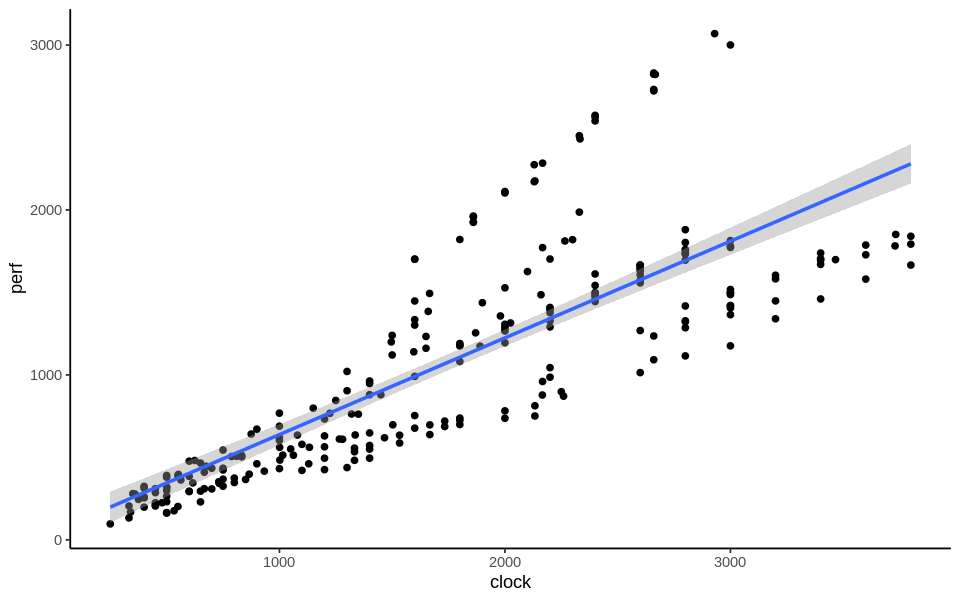

In [14]:
ggplot(int00.dat, aes(x=clock, y=perf)) + 
  geom_point() + 
    geom_smooth(method = "lm")

By examining various regression diagnostics, such as the residuals, we argued that the simple linear model `perf ~ clock` was not rich enough to accurately explain all of the variation in `perf`. 

Now, we will use multiple linear regression to add more predictors and improve the fit.

### Adding a categorical predictor
As a first step, let's try adding the categorical variable `cores` into our regression model. Recall that `cores` tells us how many cores each chip in the dataset has, and appears to explain some of the variation in performance, particularly at higher clock speeds:

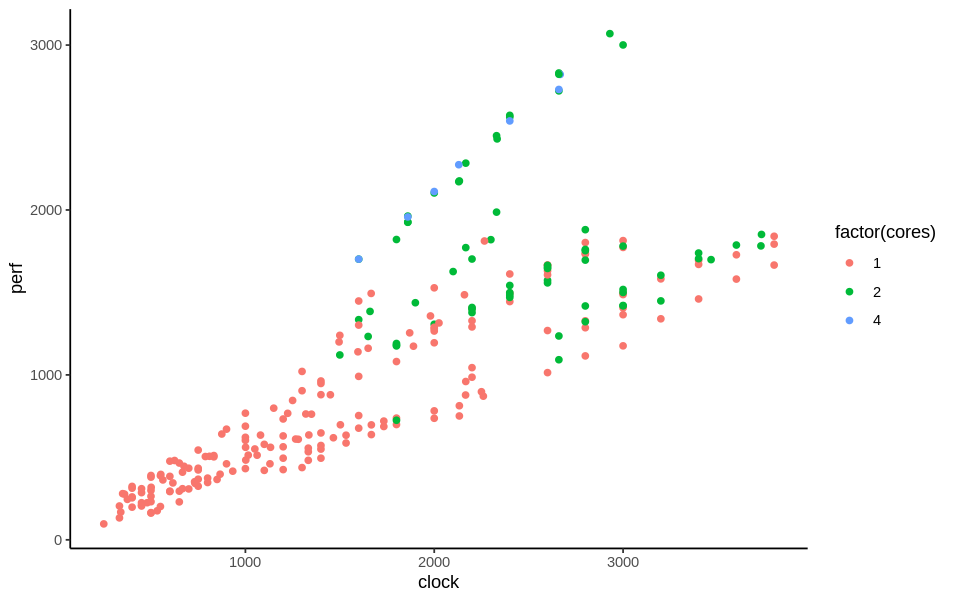

In [16]:
ggplot(int00.dat) + 
  geom_point(aes(x = clock, y = perf, color = factor(cores)))

Let's try adding `cores` into the linear regression. For the moment, we will consider `cores` as categorical, similar to how we treated `x2` in the preceding example:

In [17]:
mdl <- lm(perf ~ clock + factor(cores), int00.dat)
summary(mdl)


Call:
lm(formula = perf ~ clock + factor(cores), data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-738.32 -182.45  -56.59  142.10 1114.78 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.134e+02  4.198e+01   2.702  0.00736 ** 
clock          4.600e-01  2.395e-02  19.208  < 2e-16 ***
factor(cores)2 4.933e+02  5.034e+01   9.801  < 2e-16 ***
factor(cores)4 1.186e+03  1.199e+02   9.892  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 308 on 252 degrees of freedom
Multiple R-squared:  0.7903,	Adjusted R-squared:  0.7878 
F-statistic: 316.5 on 3 and 252 DF,  p-value: < 2.2e-16


### Interpretation of the multilinear model
Many aspects of the preceding display (residuals, $R^2$, degrees of freedom, etc.) are analogous to the case of a single predictor. The main difference is that there are now more rows in the `Coefficients` column:

```
Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.134e+02  4.198e+01   2.702  0.00736 ** 
clock          4.600e-01  2.395e-02  19.208  < 2e-16 ***
factor(cores)2 4.933e+02  5.034e+01   9.801  < 2e-16 ***
factor(cores)4 1.186e+03  1.199e+02   9.892  < 2e-16 ***
```

How do we interpret this printout? First we will give a graphical interpretation, followed by a mathematical one. 

#### Graphical explanation
Let's add the predicted values and then plot:

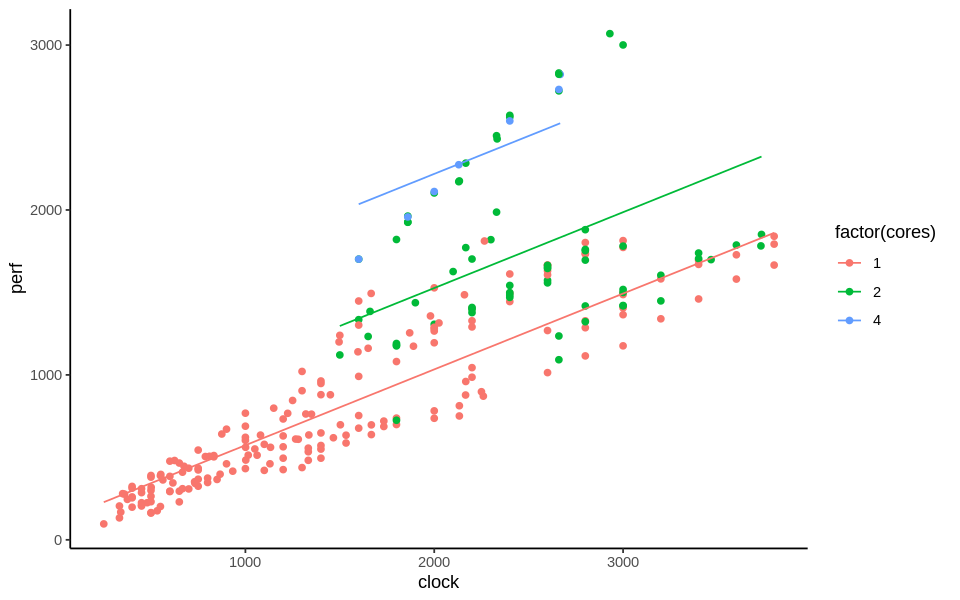

In [18]:
int00.dat %>% 
  add_predictions(mdl) %>% 
    ggplot(aes(x = clock, color = factor(cores))) +
    geom_point(aes(y = perf)) + 
    geom_line(aes(y = pred))
# 3 lines, same slope, but diff intercept 

#### Mathematical explanation
Here we can see what the linear model did: it fit three lines with different $y$-intercepts for each of the three groups of `cores`. 

Mathematically, it did this for the same reason as in the `sim2` example. The regression models for each of the groups of `cores` are:

\begin{align}
\text{perf} &= a_0 + a_1 \cdot \text{clock} & (\text{cores}=1) \\
\text{perf} &= (a_0 + a_2) + a_1 \cdot \text{clock}  & (\text{cores}=2) \\
\text{perf} &= (a_0 + a_3) + a_1 \cdot \text{clock}  & (\text{cores}=4) \\
\end{align}

Note:

perf=0+4.600e-01*1 for cores=1

constant a2 is added for cores=2

constants a3 and a5 are added for cores=4

As you can see, the intercept changes but the slope of a1*clock stays the same.

Now let's see what happens if we treat `cores` as a continuous variable in the regression:

In [ ]:
# cores is a numerical var so we don't need to factor/treat it as a categorical var:
mdl <- lm(perf ~ clock + cores, data = int00.dat) # the factor around cores is removed
summary(mdl)


Call:
lm(formula = perf ~ clock + cores, data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-700.39 -177.87  -70.02  128.18 1149.40 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -326.16139   51.00178  -6.395  7.7e-10 ***
clock          0.47226    0.02285  20.666  < 2e-16 ***
cores        431.16546   33.65503  12.811  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 309.1 on 253 degrees of freedom
Multiple R-squared:  0.788,	Adjusted R-squared:  0.7863 
F-statistic: 470.2 on 2 and 253 DF,  p-value: < 2.2e-16


The interpretation of this model is different: it says that increasing `cores` by one increases the average performance by $+431$. This is slightly different than the previous model, where the predicted mean from `cores=1` to `cores=2` and `cores=2` to `cores=4` jumped non-linearly.

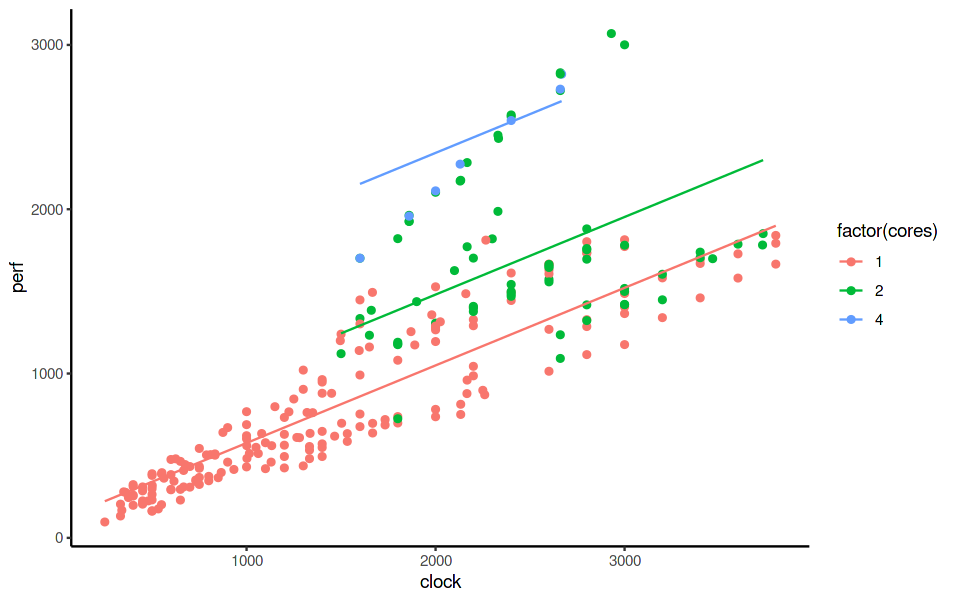

In [ ]:
int00.dat %>% add_predictions(mdl) %>% ggplot(aes(x = clock, color = factor(cores))) + 
    geom_point(aes(y = perf)) + geom_line(aes(y = pred, group = cores))

## 🤔 Quiz

`lm(formula = perf ~ clock + cores, data = int00.dat)`

What is the predicted value of `perf` when `clock=1000` and `cores=4`?

<ol style="list-style-type: upper-alpha;">
    <li>1260</li>
    <li>1565</li>
    <li>1791</li>
    <li>1871</li>
    <li>2347</li>
</ol>

In [19]:
-326.16139+1000*0.47226+4*431.16546

[1] 1870.76

### Interaction terms

In looking at the preceding plots, you are probably tempted to want to fit a model that looks like:

`geom_smooth()` using formula = 'y ~ x'


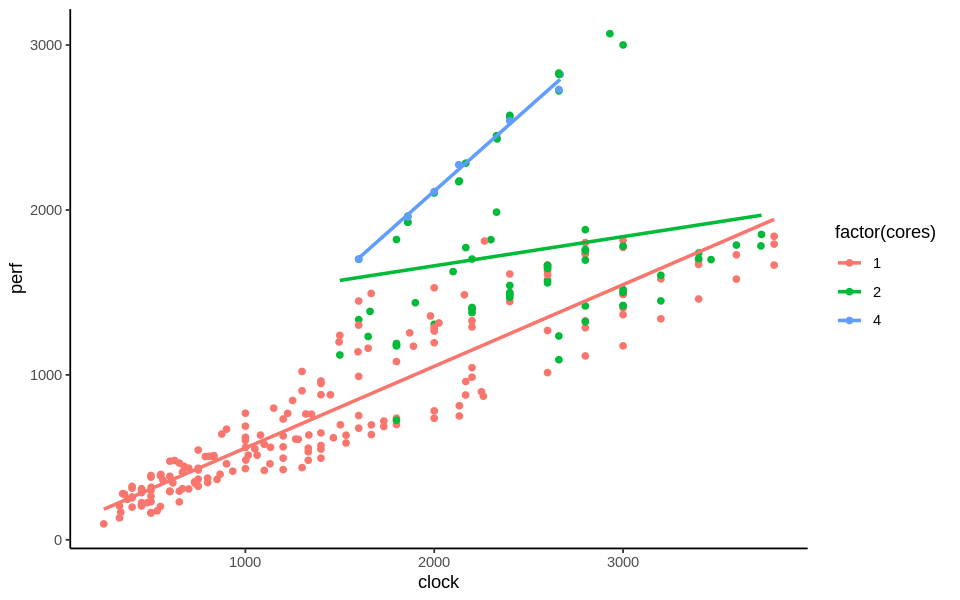

In [20]:
# ofc the intercepts r diff, but ideally, we want slopes to be diff too.
# we get this w interaction terms. 
ggplot(int00.dat, aes(x = clock, y = perf, color = factor(cores))) + 
  geom_point() + 
    geom_smooth(method = "lm", se = F)

In other words, fit a different slope and intercept to each group of observations based on their core count. In order to do this, need to introduce *interaction terms* into our linear regression.

#### Interactions: discrete $\times$ continuous
R behaves differently depending on whether we interacte continuous variables with other continuous variables, or continuous vs. discrete variables. First we consider the case of continuous vs. discrete/factor.

In [21]:
mdl <- lm(perf ~ clock * factor(cores), int00.dat)
#                ^^^^^^^^^^^^^^^^^^^^^ 
#                  interaction term 
summary(mdl)


Call:
lm(formula = perf ~ clock * factor(cores), data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-901.09 -175.22  -55.83  120.00 1243.14 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            61.55500   42.27454   1.456   0.1466    
clock                   0.49521    0.02458  20.146  < 2e-16 ***
factor(cores)2       1245.85505  173.13472   7.196 7.22e-12 ***
factor(cores)4         20.96132  660.93850   0.032   0.9747    
clock:factor(cores)2   -0.31816    0.07061  -4.506 1.01e-05 ***
clock:factor(cores)4    0.52075    0.29810   1.747   0.0819 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 295.5 on 250 degrees of freedom
Multiple R-squared:  0.8085,	Adjusted R-squared:  0.8047 
F-statistic: 211.1 on 5 and 250 DF,  p-value: < 2.2e-16


Note the presence of two new coefficients that we have not seen before: `clock:factor(cores)2` and `clock:factor(cores)4`. These are interaction terms. They work in a similar way, by allowing the slope of the `clock` variable to be different for different groups:

\begin{align}
\text{perf} &= a_0 + a_1 \cdot \text{clock} & (\text{cores}=1) \\
\text{perf} &= (a_0 + a_2) + (a_1 + a_4) \cdot \text{clock} & (\text{cores}=2) \\
\text{perf} &= (a_0 + a_3) + (a_1 + a_5) \cdot \text{clock} & (\text{cores}=4) \\
\end{align}

#### Interactions: continous $\times$ continuous
If we treat `clock` as continuous instead of discrete in the regression, something different results:

In [30]:
mdl <- lm(perf ~ clock * cores, int00.dat)
summary(mdl)


Call:
lm(formula = perf ~ clock * cores, data = int00.dat)

Residuals:
   Min     1Q Median     3Q    Max 
-726.3 -182.6  -71.4  129.7 1209.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -648.35925  153.85096  -4.214 3.49e-05 ***
clock          0.62551    0.07273   8.600 8.59e-16 ***
cores        724.40336  136.38158   5.312 2.39e-07 ***
clock:cores   -0.13198    0.05951  -2.218   0.0275 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 306.7 on 252 degrees of freedom
Multiple R-squared:  0.7921,	Adjusted R-squared:  0.7896 
F-statistic: 319.9 on 3 and 252 DF,  p-value: < 2.2e-16


Mathematically, this model is different. It says that

$$\text{perf} = a_0 + a_1 \cdot \text{clock} + a_2 \cdot \text{cores} + a_3 \cdot \text{clock} \cdot \text{cores}.$$

## 🤔 Quiz

`lm(formula = perf ~ clock * cores, data = int00.dat)`

What is the predicted value of `perf` when `clock=1000` and `cores=4`?

<ol style="list-style-type: upper-alpha;">
    <li>1260</li>
    <li>1565</li>
    <li>1791</li>
    <li>1871</li>
    <li>2347</li>
</ol>

In [33]:
# clock=1000 cores=4

# method 1
lm(perf ~ clock * cores, int00.dat)%>%
  add_predictions(tibble(clock=1000,cores=4),.)

# method 2 
tibble(clock=1000,cores=4)%>%
  add_predictions(mdl)

# method 3
a0=-648.35925
a1=0.62551
a2=724.40336
a3=-0.13198
a0+a1*1000+a2*4+a3*1000*4

clock,cores,pred
<dbl>,<dbl>,<dbl>
1000,4,2346.865


clock,cores,pred
<dbl>,<dbl>,<dbl>
1000,4,2346.865


[1] 2346.844

#### Interactions: discrete $\times$ discrete
Finally, what happens if we interact two categorical variables? `threads` is another variables in our dataset which takes on only two values, `1` or `2`:

In [37]:
lm(perf ~ factor(cores) * factor(threads), int00.dat) %>% summary

int00.dat%>%
  filter(cores==4,threads==2)

# last row is all NA b/c there r no cores=4,threads=2


Call:
lm(formula = perf ~ factor(cores) * factor(threads), data = int00.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1097.46  -341.09   -94.95   272.49  1246.84 

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       738.63      36.43  20.275  < 2e-16 ***
factor(cores)2                    896.54      96.64   9.277  < 2e-16 ***
factor(cores)4                   1566.95     179.53   8.728 3.68e-16 ***
factor(threads)2                  476.79     110.20   4.327 2.19e-05 ***
factor(cores)2:factor(threads)2  -289.49     160.32  -1.806   0.0722 .  
factor(cores)4:factor(threads)2       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 465.1 on 251 degrees of freedom
Multiple R-squared:  0.5237,	Adjusted R-squared:  0.5161 
F-statistic: 68.99 on 4 and 251 DF,  p-value: < 2.2e-16


nperf,perf,clock,threads,cores,TDP,transistors,dieSize,voltage,featureSize,channel,FO4delay,L1icache,L1dcache,L2cache,L3cache
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>


Each interaction term assigns a different conditional mean to that particular group. For example, when `cores=2` and `threads=2`, the average value of `perf` is:

```
(Intercept) + {cores=2} + {threads=2} + {cores=2} * {threads=2} = 1822.459
```

(Why is there a missing value for the `factor(cores)4:factor(threads)2` interaction term?)

In [ ]:
# mean for cores=2, threads=2

## Identifying predictors

Now we have the ability to add multiple, and potentially very many, predictors into our linear model. How should we choose which ones to add?

Unfortunately, there is no single best answer to this question! It depends on your goals, as well as the data you have. Some general rules of thumb are:

* Smaller models are more interpretable. If your goal is to understand the process(es) that generated your data, then you should try to find the smallest possible model that has good explaining power.
* If your goal is predictive accuracy, then you will generally want to use a lot of predictors:
    - Including possibly making up additional ones!
    - Too much of this can lead to a phenomenon called *overfitting*, which we will cover next week.
* To the extent possible, try to use intuition, exploratory data analysis, and/or domain knowledge as a guide. Don't just rely on algorithms to make these decisions for you!

### Example with `int00` data:

Here is the potential list of predictors we start with:

* clock 
* threads 
* cores 
* transistors
* dieSize 
* voltage 
* featureSize 
* channel
* FO4delay 
* L1icache 
* $\sqrt{L1icache}$
* L1dcache
* $\sqrt{L1dcache}$
* L2cache 
* $\sqrt{L2cache}$

This initial list has been guided by domain knowledge:

* TDP (Thermal Design Power) is not important
* Cache miss rates are proportional to the square root of the cache size

Cache Reference: https://en.wikipedia.org/wiki/CPU_cache


### Regression on everything
Let's first try including all regressors into our model:

In [38]:
lm(perf ~ ., int00.dat) %>% summary


Call:
lm(formula = perf ~ ., data = int00.dat)

Residuals:
ALL 3 residuals are 0: no residual degrees of freedom!

Coefficients: (13 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  9.651e+01        NaN     NaN      NaN
nperf        2.973e+01        NaN     NaN      NaN
clock       -2.644e-16        NaN     NaN      NaN
threads             NA         NA      NA       NA
cores               NA         NA      NA       NA
TDP                 NA         NA      NA       NA
transistors         NA         NA      NA       NA
dieSize             NA         NA      NA       NA
voltage             NA         NA      NA       NA
featureSize         NA         NA      NA       NA
channel             NA         NA      NA       NA
FO4delay            NA         NA      NA       NA
L1icache            NA         NA      NA       NA
L1dcache            NA         NA      NA       NA
L2cache             NA         NA      NA       NA
L3cache     

We get a garbage answer because one of the predictors is missing for every observation:

In [39]:
summary(int00.dat)

     nperf             perf             clock           threads    
 Min.   :  0.00   Min.   :  96.51   Min.   : 250.0   Min.   :1.00  
 1st Qu.: 13.31   1st Qu.: 492.12   1st Qu.: 983.2   1st Qu.:1.00  
 Median : 30.47   Median :1002.44   Median :1700.0   Median :1.00  
 Mean   : 33.03   Mean   :1078.40   Mean   :1750.9   Mean   :1.23  
 3rd Qu.: 49.75   3rd Qu.:1575.41   3rd Qu.:2400.0   3rd Qu.:1.00  
 Max.   :100.00   Max.   :3069.30   Max.   :3800.0   Max.   :2.00  
                                                                   
     cores           TDP          transistors        dieSize     
 Min.   :1.00   Min.   : 11.00   Min.   :   5.1   Min.   : 81.0  
 1st Qu.:1.00   1st Qu.: 52.25   1st Qu.:  29.0   1st Qu.:127.5  
 Median :1.00   Median : 77.50   Median : 151.0   Median :162.0  
 Mean   :1.34   Mean   : 76.31   Mean   : 180.9   Mean   :193.4  
 3rd Qu.:2.00   3rd Qu.: 98.75   3rd Qu.: 276.0   3rd Qu.:229.0  
 Max.   :4.00   Max.   :165.00   Max.   :1328.0   Max.   :46

In [40]:
lm(nperf ~ clock + threads + cores + featureSize + FO4delay + L1icache + L1dcache + L2cache, int00.dat) %>% summary
# drop highest p vals 


Call:
lm(formula = nperf ~ clock + threads + cores + featureSize + 
    FO4delay + L1icache + L1dcache + L2cache, data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.962  -6.121  -1.537   6.101  36.485 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.350e+01  8.037e+00   4.168 4.64e-05 ***
clock        8.627e-03  1.406e-03   6.135 4.72e-09 ***
threads      1.146e-01  2.309e+00   0.050   0.9605    
cores        7.577e+00  1.594e+00   4.755 3.88e-06 ***
featureSize -2.958e+02  5.947e+01  -4.974 1.44e-06 ***
FO4delay     3.900e-01  1.605e-01   2.430   0.0160 *  
L1icache     2.035e-01  8.087e-02   2.516   0.0127 *  
L1dcache    -1.847e-01  8.538e-02  -2.163   0.0318 *  
L2cache      9.581e-04  5.384e-04   1.780   0.0767 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.18 on 193 degrees of freedom
  (54 observations deleted due to missingness)
Multiple R-squared:  0.7809,	Adjuste

Now let's fit the same model, but add the square-root of all the cache sizes.

In [41]:
# take sq root for all the caches: 
cache_sqrts <- function(df) {
    df %>% mutate(across(ends_with("cache"), list(sqrt=sqrt)))
}
int00.aug <- int00.dat %>% 
    select(perf, clock, threads, cores, featureSize, FO4delay, L1icache, L1dcache, L2cache) %>% 
    cache_sqrts
lm(perf ~ ., int00.aug) %>% summary


Call:
lm(formula = perf ~ ., data = int00.aug)

Residuals:
    Min      1Q  Median      3Q     Max 
-445.01 -160.99  -13.01   97.32  824.59 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.862e+02  2.733e+02  -2.145  0.03325 *  
clock          2.775e-01  3.463e-02   8.013 1.11e-13 ***
threads        9.650e+01  6.803e+01   1.418  0.15771    
cores          9.370e+01  4.249e+01   2.205  0.02864 *  
featureSize   -1.004e+04  1.628e+03  -6.170 4.03e-09 ***
FO4delay       2.190e+01  4.333e+00   5.053 1.02e-06 ***
L1icache      -9.895e+01  1.549e+01  -6.388 1.26e-09 ***
L1dcache       7.178e+01  1.531e+01   4.689 5.22e-06 ***
L2cache       -1.166e-01  3.502e-02  -3.329  0.00105 ** 
L1icache_sqrt  1.377e+03  2.026e+02   6.796 1.35e-10 ***
L1dcache_sqrt -1.006e+03  1.993e+02  -5.049 1.04e-06 ***
L2cache_sqrt   2.125e+01  4.201e+00   5.058 9.96e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 248.4 on 

Or we could go even farther and add all possible interactions into our model:

In [43]:
# now we truly have a big num of vars 
large_mdl <- lm(perf ~ .^2, int00.aug)
summary(large_mdl)


Call:
lm(formula = perf ~ .^2, data = int00.aug)

Residuals:
     Min       1Q   Median       3Q      Max 
-297.809  -27.797    0.741   25.798  297.429 

Coefficients: (9 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  9.907e+04  1.592e+05   0.622 0.534666    
clock                       -5.764e-01  3.948e-01  -1.460 0.146531    
threads                     -2.705e+05  2.150e+05  -1.258 0.210449    
cores                       -1.115e+04  3.880e+03  -2.873 0.004687 ** 
featureSize                 -2.345e+05  1.120e+05  -2.094 0.037989 *  
FO4delay                     1.743e+03  6.485e+02   2.688 0.008041 ** 
L1icache                    -2.968e+04  1.652e+04  -1.797 0.074435 .  
L1dcache                     1.884e+04  1.071e+04   1.758 0.080828 .  
L2cache                      1.781e+00  5.248e+00   0.339 0.734899    
L1icache_sqrt                1.395e+05  6.596e+04   2.115 0.036151 *  
L1dcache_

Now $R^2$ is almost 1, meaninng we explained nearly all the variation in `perf` using these data. But, there are at least two reasons why we might want a to favor a smaller model instead:
- The large model conveys almost no intuition about what drives increases or decreases in `perf`.
- The large model li

In [ ]:
# R2 for int06.dat

Warning message in predict.lm(model, data):
“prediction from a rank-deficient fit may be misleading”


sse,ssr
<dbl>,<dbl>
9987.089,194389134919


In [ ]:
stepAIC(large_mdl) %>% summary

Start:  AIC=1775.32
perf ~ (clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt)^2


Step:  AIC=1775.32
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:cores + clock:featureSize + clock:FO4delay + 
    clock:L1icache + clock:L1dcache + clock:L2cache + clock:L1icache_sqrt + 
    clock:L1dcache_sqrt + clock:L2cache_sqrt + threads:cores + 
    threads:featureSize + threads:FO4delay + threads:L1icache + 
    threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + threads:L2cache_sqrt + cores:featureSize + 
    cores:FO4delay + cores:L1icache + cores:L1dcache + cores:L2cache + 
    cores:L1icache_sqrt + cores:L1dcache_sqrt + cores:L2cache_sqrt + 
    featureSize:FO4delay + featureSize:L1icache + featureSize:L1dcache + 
    featureSize:L2cache + featureSize:L1


Step:  AIC=1775.32
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:cores + clock:featureSize + clock:FO4delay + 
    clock:L1icache + clock:L1dcache + clock:L2cache + clock:L1icache_sqrt + 
    clock:L1dcache_sqrt + clock:L2cache_sqrt + threads:cores + 
    threads:featureSize + threads:FO4delay + threads:L1icache + 
    threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + threads:L2cache_sqrt + cores:featureSize + 
    cores:FO4delay + cores:L1icache + cores:L1dcache + cores:L2cache + 
    cores:L1icache_sqrt + cores:L1dcache_sqrt + cores:L2cache_sqrt + 
    featureSize:FO4delay + featureSize:L1icache + featureSize:L1dcache + 
    featureSize:L2cache + featureSize:L1icache_sqrt + featureSize:L1dcache_sqrt + 
    featureSize:L2cache_sqrt + FO4delay:L1icache + FO4delay:L1dcache + 
    FO4delay:L2cache + FO4delay:L1icache_sqrt + FO


Step:  AIC=1771.38
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:cores + clock:FO4delay + clock:L1icache + 
    clock:L1dcache + clock:L2cache + clock:L1icache_sqrt + clock:L1dcache_sqrt + 
    clock:L2cache_sqrt + threads:cores + threads:featureSize + 
    threads:FO4delay + threads:L1icache + threads:L1dcache + 
    threads:L2cache + threads:L1icache_sqrt + threads:L1dcache_sqrt + 
    threads:L2cache_sqrt + cores:featureSize + cores:FO4delay + 
    cores:L1icache + cores:L2cache + cores:L1icache_sqrt + cores:L2cache_sqrt + 
    featureSize:FO4delay + featureSize:L1icache + featureSize:L1dcache + 
    featureSize:L2cache + featureSize:L1icache_sqrt + featureSize:L1dcache_sqrt + 
    featureSize:L2cache_sqrt + FO4delay:L1icache + FO4delay:L1dcache + 
    FO4delay:L2cache + FO4delay:L1icache_sqrt + FO4delay:L2cache_sqrt + 
    L1icache:L1dcache + L1icache:L2cache 

                             Df Sum of Sq    RSS    AIC
- FO4delay:L2cache_sqrt       1      1665 748774 1766.0
- clock:FO4delay              1      2218 749326 1766.2
- FO4delay:L1icache           1      2280 749388 1766.2
- cores:featureSize           1      3784 750893 1766.6
- featureSize:FO4delay        1      3828 750936 1766.6
- threads:L2cache_sqrt        1      3928 751036 1766.6
- featureSize:L2cache_sqrt    1      4242 751350 1766.7
- threads:L2cache             1      4930 752038 1766.9
- threads:L1icache            1      5343 752452 1767.0
- threads:L1icache_sqrt       1      6087 753195 1767.2
- cores:FO4delay              1      6141 753250 1767.2
<none>                                    747108 1767.6
- L1icache_sqrt:L2cache_sqrt  1      8728 755837 1767.9
- FO4delay:L1dcache           1     11203 758311 1768.6
- threads:L1dcache            1     13023 760132 1769.1
- threads:featureSize         1     13182 760290 1769.1
- threads:L1dcache_sqrt       1     13512 760621


Step:  AIC=1762.98
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:L1icache + clock:L1dcache + clock:L2cache + 
    clock:L1icache_sqrt + clock:L1dcache_sqrt + threads:cores + 
    threads:featureSize + threads:FO4delay + threads:L1icache + 
    threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + threads:L2cache_sqrt + cores:featureSize + 
    cores:FO4delay + cores:L1icache + cores:L2cache + cores:L1icache_sqrt + 
    cores:L2cache_sqrt + featureSize:FO4delay + featureSize:L1icache + 
    featureSize:L1dcache + featureSize:L2cache + featureSize:L1icache_sqrt + 
    featureSize:L1dcache_sqrt + featureSize:L2cache_sqrt + FO4delay:L1dcache + 
    FO4delay:L2cache + FO4delay:L1icache_sqrt + L1icache:L1dcache + 
    L1icache:L2cache + L1icache:L1icache_sqrt + L1icache:L1dcache_sqrt + 
    L1dcache:L2cache + L2cache:L1icache_sqrt + L


Call:
lm(formula = perf ~ clock + threads + cores + featureSize + FO4delay + 
    L1icache + L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + 
    L2cache_sqrt + clock:threads + clock:L1icache + clock:L1dcache + 
    clock:L2cache + clock:L1icache_sqrt + clock:L1dcache_sqrt + 
    threads:cores + threads:featureSize + threads:FO4delay + 
    threads:L1icache + threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + cores:featureSize + cores:FO4delay + 
    cores:L1icache + cores:L2cache + cores:L1icache_sqrt + cores:L2cache_sqrt + 
    featureSize:L1icache + featureSize:L1dcache + featureSize:L2cache + 
    featureSize:L1icache_sqrt + featureSize:L1dcache_sqrt + featureSize:L2cache_sqrt + 
    FO4delay:L1dcache + FO4delay:L2cache + FO4delay:L1icache_sqrt + 
    L1icache:L1dcache + L1icache:L2cache + L1icache:L1icache_sqrt + 
    L1icache:L1dcache_sqrt + L1dcache:L2cache + L2cache:L1icache_sqrt + 
    L2cache:L2cache_sqrt + L1icache_sqrt:L2cache_sq

### Overfitting

What happened here is an example of overfitting. Essentially, the model has learned not just the "inherent relationship" between the predictors and the outcome, but also all of the one-off noise that was present. Since the noise will be different from one dataset to the next, prediction will be bad when we try our model on unseen data.

$$ Y = f(X) + \epsilon $$ 

$$
\overbrace{Y}^{\text{outcome}} = 
\underbrace{\overbrace{f(X)}^{\text{signal}}}_{\text{want to learn}} + \underbrace{\overbrace{\epsilon}^{\text{noise}}}_{\text{do not want to learn}}
$$

#### Visual explanation of overfitting
Here is a visual explanation of overfitting. Consider the points shown in the plot below:

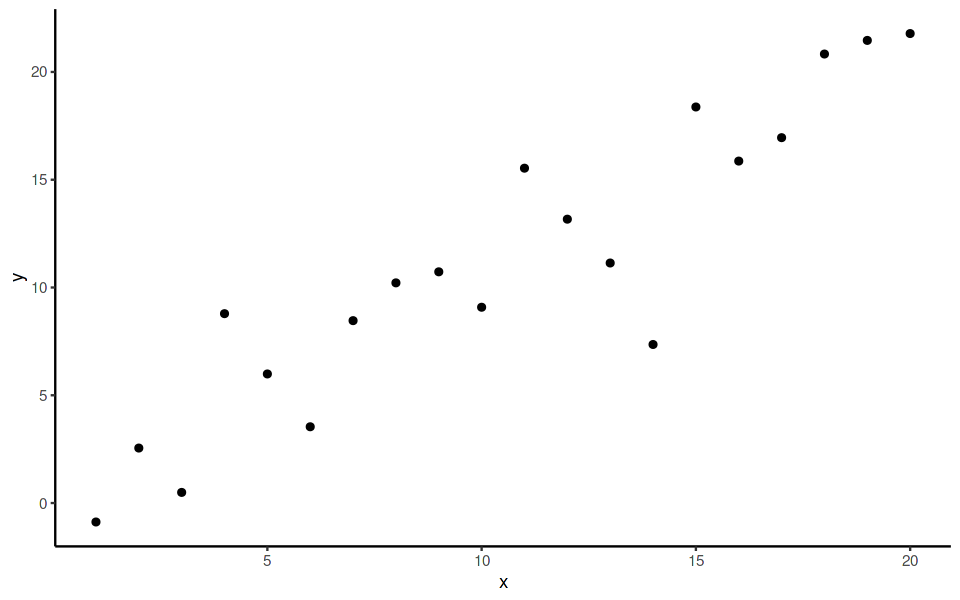

In [ ]:
set.seed(1)
(p <- tibble(x = 1:20, y = x + 3 * rnorm(n = 20)) %>% ggplot(aes(x = x, y = y)) + geom_point())

Now let's consider the predicted value of a new point shown in red:

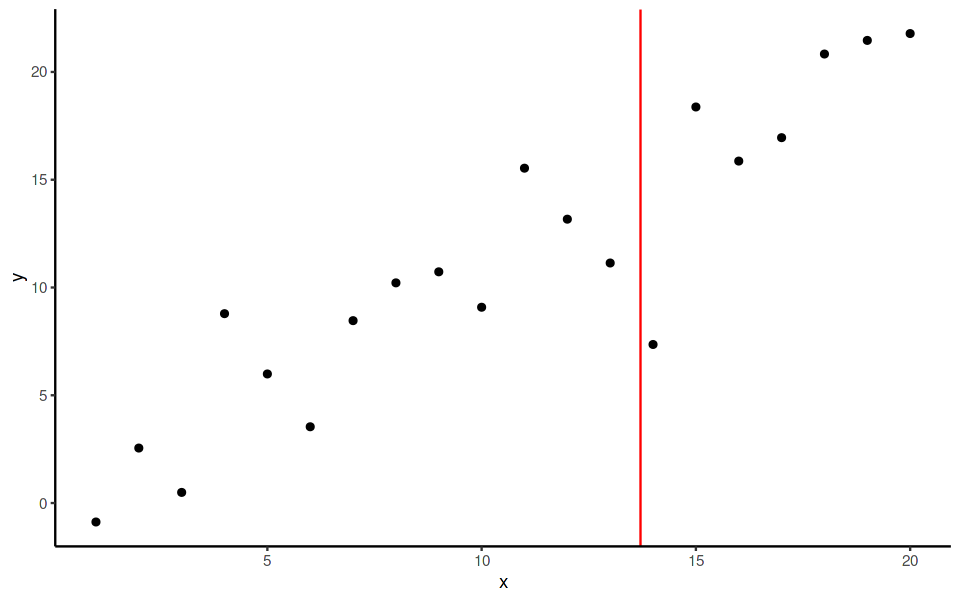

In [ ]:
(p <- p + geom_vline(xintercept = 13.7, color = "red"))

What should my prediction be? One option would be to just connect all the dots with a line, and fine the intersection of that "function" with the vertical red line:

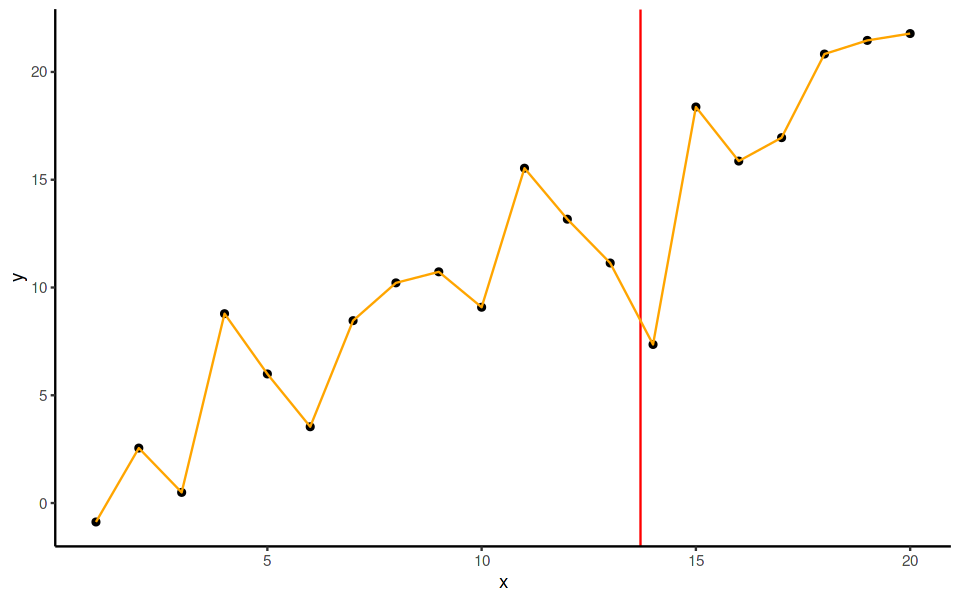

In [ ]:
(p <- p + geom_line(color="orange"))

I'd get a value about $y=6$.

If you believe what we have been saying all week, then another option is to fit a regression line:

`geom_smooth()` using formula = 'y ~ x'


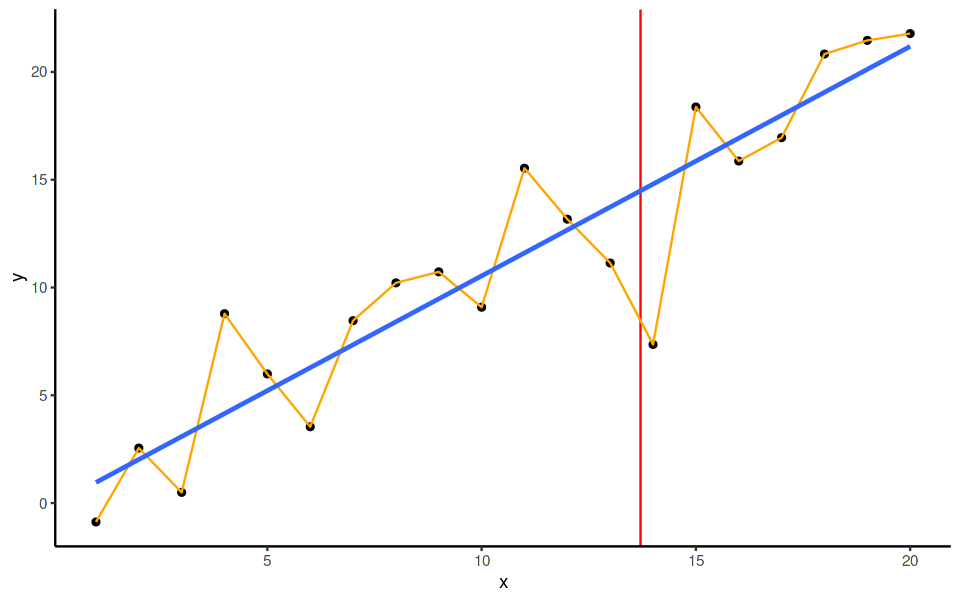

In [ ]:
(p <- p + geom_smooth(se = F, method = "lm"))

I'd get a value of about $y=12$ &mdash; quite different! 

Which is the correct answer? In other words, which is the correct model? In statistics this is known as "[model selection](https://en.wikipedia.org/wiki/Model_selection)". In general, it is one of the  hardest problems a statistician faces &mdash; much harder than estimation, generally. There are a couple of options: 

1. Use statistical theory to create a "model selection" procedure.
2. If more data are available, evaluate candidate models by their ability to predict out-of-sample.

Nowadays, #2 is by far the dominant paradigm and is the basis for almost all machine learning methods.

### Out-of-sample prediction
The idea of out-of-sample prediction is simple: evaluate a model by how well it predicts on data that it has never seen before.

`geom_smooth()` using formula = 'y ~ x'


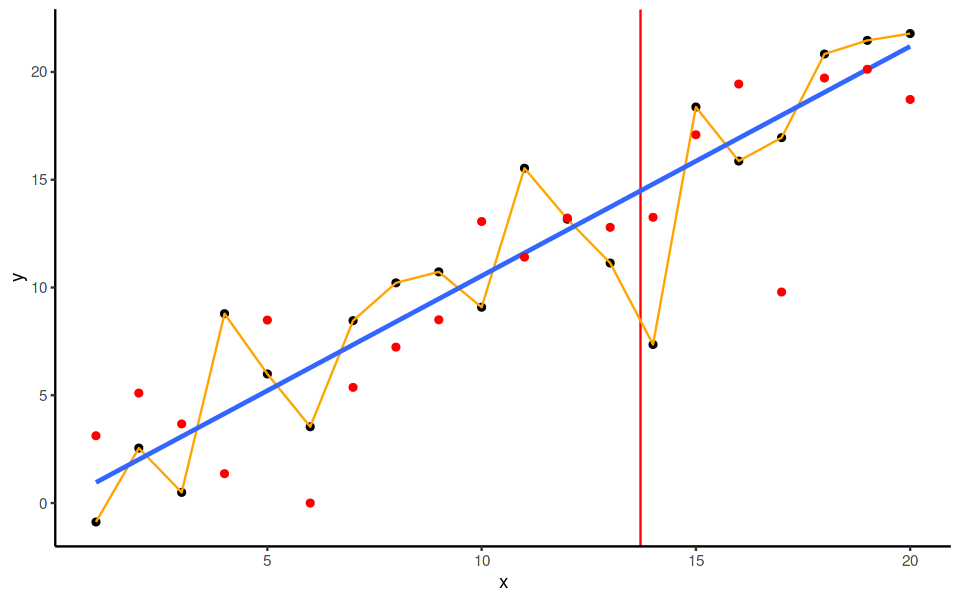

In [ ]:
p + geom_point(data = tibble(x = 1:20, y_test = x + 3 * rnorm(n = 20)),
               aes(x = x, y= y_test),
               color = "red")

### Stepwise regression
Start with all predictors and then iteratively:
1. Fit the current model using `lm`
2. Drop predictors according to some threshold.
3. Repeat until all the predictors are significant.

In [ ]:
MASS::stepAIC(large_mdl)

Start:  AIC=1775.32
perf ~ (clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt)^2


Step:  AIC=1775.32
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:cores + clock:featureSize + clock:FO4delay + 
    clock:L1icache + clock:L1dcache + clock:L2cache + clock:L1icache_sqrt + 
    clock:L1dcache_sqrt + clock:L2cache_sqrt + threads:cores + 
    threads:featureSize + threads:FO4delay + threads:L1icache + 
    threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + threads:L2cache_sqrt + cores:featureSize + 
    cores:FO4delay + cores:L1icache + cores:L1dcache + cores:L2cache + 
    cores:L1icache_sqrt + cores:L1dcache_sqrt + cores:L2cache_sqrt + 
    featureSize:FO4delay + featureSize:L1icache + featureSize:L1dcache + 
    featureSize:L2cache + featureSize:L1


Step:  AIC=1775.32
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:cores + clock:featureSize + clock:FO4delay + 
    clock:L1icache + clock:L1dcache + clock:L2cache + clock:L1icache_sqrt + 
    clock:L1dcache_sqrt + clock:L2cache_sqrt + threads:cores + 
    threads:featureSize + threads:FO4delay + threads:L1icache + 
    threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + threads:L2cache_sqrt + cores:featureSize + 
    cores:FO4delay + cores:L1icache + cores:L1dcache + cores:L2cache + 
    cores:L1icache_sqrt + cores:L1dcache_sqrt + cores:L2cache_sqrt + 
    featureSize:FO4delay + featureSize:L1icache + featureSize:L1dcache + 
    featureSize:L2cache + featureSize:L1icache_sqrt + featureSize:L1dcache_sqrt + 
    featureSize:L2cache_sqrt + FO4delay:L1icache + FO4delay:L1dcache + 
    FO4delay:L2cache + FO4delay:L1icache_sqrt + FO


Step:  AIC=1771.38
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:cores + clock:FO4delay + clock:L1icache + 
    clock:L1dcache + clock:L2cache + clock:L1icache_sqrt + clock:L1dcache_sqrt + 
    clock:L2cache_sqrt + threads:cores + threads:featureSize + 
    threads:FO4delay + threads:L1icache + threads:L1dcache + 
    threads:L2cache + threads:L1icache_sqrt + threads:L1dcache_sqrt + 
    threads:L2cache_sqrt + cores:featureSize + cores:FO4delay + 
    cores:L1icache + cores:L2cache + cores:L1icache_sqrt + cores:L2cache_sqrt + 
    featureSize:FO4delay + featureSize:L1icache + featureSize:L1dcache + 
    featureSize:L2cache + featureSize:L1icache_sqrt + featureSize:L1dcache_sqrt + 
    featureSize:L2cache_sqrt + FO4delay:L1icache + FO4delay:L1dcache + 
    FO4delay:L2cache + FO4delay:L1icache_sqrt + FO4delay:L2cache_sqrt + 
    L1icache:L1dcache + L1icache:L2cache 

                             Df Sum of Sq    RSS    AIC
- FO4delay:L2cache_sqrt       1      1665 748774 1766.0
- clock:FO4delay              1      2218 749326 1766.2
- FO4delay:L1icache           1      2280 749388 1766.2
- cores:featureSize           1      3784 750893 1766.6
- featureSize:FO4delay        1      3828 750936 1766.6
- threads:L2cache_sqrt        1      3928 751036 1766.6
- featureSize:L2cache_sqrt    1      4242 751350 1766.7
- threads:L2cache             1      4930 752038 1766.9
- threads:L1icache            1      5343 752452 1767.0
- threads:L1icache_sqrt       1      6087 753195 1767.2
- cores:FO4delay              1      6141 753250 1767.2
<none>                                    747108 1767.6
- L1icache_sqrt:L2cache_sqrt  1      8728 755837 1767.9
- FO4delay:L1dcache           1     11203 758311 1768.6
- threads:L1dcache            1     13023 760132 1769.1
- threads:featureSize         1     13182 760290 1769.1
- threads:L1dcache_sqrt       1     13512 760621


Step:  AIC=1762.98
perf ~ clock + threads + cores + featureSize + FO4delay + L1icache + 
    L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + L2cache_sqrt + 
    clock:threads + clock:L1icache + clock:L1dcache + clock:L2cache + 
    clock:L1icache_sqrt + clock:L1dcache_sqrt + threads:cores + 
    threads:featureSize + threads:FO4delay + threads:L1icache + 
    threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + threads:L2cache_sqrt + cores:featureSize + 
    cores:FO4delay + cores:L1icache + cores:L2cache + cores:L1icache_sqrt + 
    cores:L2cache_sqrt + featureSize:FO4delay + featureSize:L1icache + 
    featureSize:L1dcache + featureSize:L2cache + featureSize:L1icache_sqrt + 
    featureSize:L1dcache_sqrt + featureSize:L2cache_sqrt + FO4delay:L1dcache + 
    FO4delay:L2cache + FO4delay:L1icache_sqrt + L1icache:L1dcache + 
    L1icache:L2cache + L1icache:L1icache_sqrt + L1icache:L1dcache_sqrt + 
    L1dcache:L2cache + L2cache:L1icache_sqrt + L


Call:
lm(formula = perf ~ clock + threads + cores + featureSize + FO4delay + 
    L1icache + L1dcache + L2cache + L1icache_sqrt + L1dcache_sqrt + 
    L2cache_sqrt + clock:threads + clock:L1icache + clock:L1dcache + 
    clock:L2cache + clock:L1icache_sqrt + clock:L1dcache_sqrt + 
    threads:cores + threads:featureSize + threads:FO4delay + 
    threads:L1icache + threads:L1dcache + threads:L2cache + threads:L1icache_sqrt + 
    threads:L1dcache_sqrt + cores:featureSize + cores:FO4delay + 
    cores:L1icache + cores:L2cache + cores:L1icache_sqrt + cores:L2cache_sqrt + 
    featureSize:L1icache + featureSize:L1dcache + featureSize:L2cache + 
    featureSize:L1icache_sqrt + featureSize:L1dcache_sqrt + featureSize:L2cache_sqrt + 
    FO4delay:L1dcache + FO4delay:L2cache + FO4delay:L1icache_sqrt + 
    L1icache:L1dcache + L1icache:L2cache + L1icache:L1icache_sqrt + 
    L1icache:L1dcache_sqrt + L1dcache:L2cache + L2cache:L1icache_sqrt + 
    L2cache:L2cache_sqrt + L1icache_sqrt:L2cache_sq

In [45]:
int00.lm.full <- lm(nperf ~ clock + threads + cores +
transistors + dieSize + voltage + featureSize + channel +
FO4delay + L1icache + sqrt(L1icache) + L1dcache +
sqrt(L1dcache) + L2cache + sqrt(L2cache), data=int00.dat)

In [46]:
 summary(int00.lm.full)


Call:
lm(formula = nperf ~ clock + threads + cores + transistors + 
    dieSize + voltage + featureSize + channel + FO4delay + L1icache + 
    sqrt(L1icache) + L1dcache + sqrt(L1dcache) + L2cache + sqrt(L2cache), 
    data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.804  -2.702   0.000   2.285   9.809 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.108e+01  7.852e+01  -0.268  0.78927    
clock           2.605e-02  1.671e-03  15.594  < 2e-16 ***
threads        -2.346e+00  2.089e+00  -1.123  0.26596    
cores           2.246e+00  1.782e+00   1.260  0.21235    
transistors    -5.580e-03  1.388e-02  -0.402  0.68897    
dieSize         1.021e-02  1.746e-02   0.585  0.56084    
voltage        -2.623e+01  7.698e+00  -3.408  0.00117 ** 
featureSize     3.101e+01  1.122e+02   0.276  0.78324    
channel         9.496e+01  5.945e+02   0.160  0.87361    
FO4delay       -1.765e-02  1.600e+00  -0.011  0.99123    
L1icache        

In [ ]:
# degree of freedom
missing = 179
df = nrow(int00.dat) - missing - 16
df

[1] 61

### Drop candidate

`FO4delay       -1.765e-02  1.600e+00  -0.011  0.99123   `

p-value = 0.99123 which is > 0.05

Let us now update our model by removing this predictor using the update function

In [47]:
int00.lm.2 <- update(int00.lm.full, .~. - FO4delay, data =
int00.dat)
summary(int00.lm.2)


Call:
lm(formula = nperf ~ clock + threads + cores + transistors + 
    dieSize + voltage + featureSize + channel + L1icache + sqrt(L1icache) + 
    L1dcache + sqrt(L1dcache) + L2cache + sqrt(L2cache), data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.795  -2.714   0.000   2.283   9.809 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.088e+01  7.584e+01  -0.275 0.783983    
clock           2.604e-02  1.563e-03  16.662  < 2e-16 ***
threads        -2.345e+00  2.070e+00  -1.133 0.261641    
cores           2.248e+00  1.759e+00   1.278 0.206080    
transistors    -5.556e-03  1.359e-02  -0.409 0.684020    
dieSize         1.013e-02  1.571e-02   0.645 0.521488    
voltage        -2.626e+01  7.302e+00  -3.596 0.000642 ***
featureSize     3.104e+01  1.113e+02   0.279 0.781232    
channel         8.855e+01  1.218e+02   0.727 0.469815    
L1icache        1.103e+02  4.041e+01   2.729 0.008257 ** 
sqrt(L1icache) -7.398e+02  2.866

Similarly drop featureSize, transistors, dieSize. 

Along the way notice that 
* the missingness value improves as lesser and lesser number of observations are dropped along the way (the features contributing to missingness are eliminated one-by-one)
* degree of freedom increases accordingly as well




### F-test
F-test compares the current model to a model
with one fewer predictor. 
* If the current model is better than the reduced
model, the p-value will be small. 


### Residual Analysis



Warning message:
“not plotting observations with leverage one:
  45”


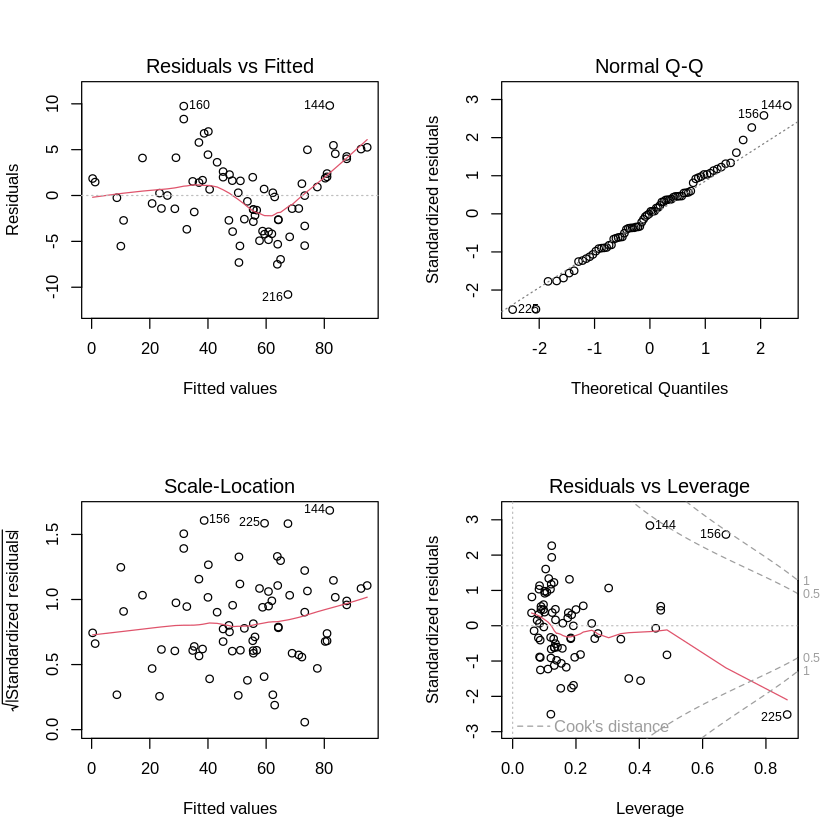

In [ ]:
par(mfrow=c(2,2))
plot(int00.lm.2)

### What could go wrong?

Let us look into another dataset `int92.dat`. This contains the data from the CPU DB database for all of the processors for which performance results were available for the SPEC Integer 1992 (Int1992) benchmark program.

In [ ]:
int92.lm.full <- lm(nperf ~ clock + threads + cores +
transistors + dieSize + voltage + featureSize + channel +
FO4delay + L1icache + sqrt(L1icache) + L1dcache +
sqrt(L1dcache) + L2cache + sqrt(L2cache), data=int92.dat)

summary(int92.lm.full)


Call:
lm(formula = nperf ~ clock + threads + cores + transistors + 
    dieSize + voltage + featureSize + channel + FO4delay + L1icache + 
    sqrt(L1icache) + L1dcache + sqrt(L1dcache) + L2cache + sqrt(L2cache), 
    data = int92.dat)

Residuals:
     14      15      16      17      18      19 
 0.4096  1.3957 -2.3612  0.1498 -1.5513  1.9575 

Coefficients: (14 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -25.93278    6.56141  -3.952   0.0168 *  
clock            0.35422    0.02184  16.215 8.46e-05 ***
threads               NA         NA      NA       NA    
cores                 NA         NA      NA       NA    
transistors           NA         NA      NA       NA    
dieSize               NA         NA      NA       NA    
voltage               NA         NA      NA       NA    
featureSize           NA         NA      NA       NA    
channel               NA         NA      NA       NA    
FO4delay              NA  

Hmm...let us figure out how many observations we have

In [ ]:
nrow(int92.dat)

[1] 78

Let us take a look at the clock values

In [ ]:
int92.dat$clock %>% table

.
 48  50  60  64  66  70  75  77  80  85  90  96  99 100 101 110 118 120 125 133 
  1   3   4   1   5   1   4   1   2   1   2   1   2  10   1   1   1   3   4   4 
150 166 175 180 190 200 225 231 233 250 266 275 291 300 333 350 
  3   2   2   1   1   4   1   1   2   2   2   1   1   1   1   1 

And now the thread column values

In [ ]:
int92.dat$threads %>% table

.
 1 
78 

🤔 Quiz

A variable with only one value across all the observations is a good predictor

A. True

B. False



In [ ]:
int92.dat$cores %>% table

.
 1 
78 

In [ ]:
int92.dat$L2cache %>% table

.
 96 256 512 
  6   2   2 